# Networks

In this last exercise, you will start to put into practice some of the concepts learned in class. Start by importing the libraries that you will need.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We give you the network of the 34 members of [karate clubs](https://en.wikipedia.org/wiki/Zachary's_karate_club) on the campus. Each node is a member of one of two clubs ("Mr. Hi" or "Officer") and there is an edge between two nodes if the two are friends outside of the club.

In [2]:
karate_club = nx.karate_club_graph()

## Visualization

1. Visualize the network by
    - painting every 'Mr. Hi' member in **blue** and every 'Officer' member in **red**, and
    - drawing the label corresponding to the member index (between 1 and 34) on each node.
2. What can you tell about the nodes and their connections? Do you see some nodes with more/less links than others? Who can they be?

In [14]:
pos = nx.spring_layout(karate_club)
data = karate_club.nodes.data()
print(karate_club.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


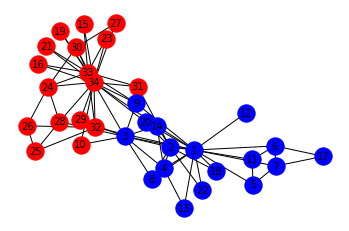

In [26]:
# Get the position of the nodes
pos = nx.spring_layout(karate_club) # positions for all nodes

# Initialize data structures
labels = {}
officer = []
mr_hi = []

# Collect the labels and assign the nodes to clubs
for n in karate_club.nodes.data():
    node = n[0] # node index, e.g., 0
    club = n[1]["club"] # node club, e.g., "Mr. Hi" or "Officer"
    if club == 'Officer':
        officer.append(node)
    else:
        mr_hi.append(node)
    labels[node] = node+1
    
# Draw the network
nx.draw_networkx_nodes(karate_club, pos, nodelist=officer, node_color='r')
nx.draw_networkx_nodes(karate_club, pos, nodelist=mr_hi, node_color='b')
nx.draw_networkx_edges(karate_club, pos)
nx.draw_networkx_labels(karate_club, pos, labels, font_size=10)
plt.axis('off');

## Degree Distribution

1. Plot the degree distribution of the network.
2. Does it confirm your answer to the previous question?

In [35]:
# Get the list of the degree per node
degrees = np.array(list(dict(karate_club.degree()).values()))
ind = np.argsort(degrees)[::-1]
print(ind)

[33  0 32  2  1 31  3 23 13  8 27  5  6 29 30  7 25 24 28 10  4 19  9 15
 12 14 17 18 20 21 22 26 16 11]


  Node Degree
    33     17
     0     16
    32     12
     2     10
     1      9
    31      6
     3      6
    23      5
    13      5
     8      5


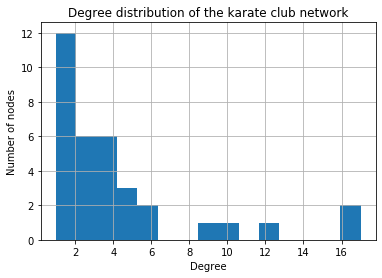

In [37]:
# Get the list of the degree per node
degrees = np.array(list(dict(karate_club.degree()).values()))

# Get the indices of the nodes in decreasing order w.r.t their degree
ind = np.argsort(degrees)[::-1]

# Print the 10 first nodes and 
nodes_degree = ["%6d %6d" % (a, b) for a, b in zip(ind, degrees[ind])][:10]
print("%6s %6s" % ("Node", "Degree"))
print('\n'.join(nodes_degree))

# Plot the histogram
plt.hist(degrees, bins=15)
plt.title("Degree distribution of the karate club network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid()
plt.show()